### 1️⃣ Load the Dataset
We load the train and test datasets to begin the data analysis and model training process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

### 2️⃣ Display Basic Info
We display basic information about the train and test datasets, including the data types and the number of entries.

In [2]:
# Display basic info
print("Training Data Info:")
print(train_df.info())
print("\nTesting Data Info:")
print(test_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


### 3️⃣ Check the First Few Rows of the Dataset
We inspect the first few rows of the train dataset to get an initial view of the data structure.

In [3]:
# Check the first few rows of the dataset
print("\nFirst few rows of training data:")
print(train_df.head())


First few rows of training data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel78

### 4️⃣ Check the Shape of the Datasets
We check the dimensions (shape) of the train and test datasets to understand the number of rows (samples) and columns (features).

In [4]:
# Check the shape of the datasets
print(f"\nTraining Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")


Training Data Shape: (42000, 785)
Testing Data Shape: (28000, 784)


### 5️⃣ Separate Labels and Features
We separate the labels and features in the train dataset, assuming the first column contains the labels and the remaining columns contain the pixel values.

In [5]:
# Separate labels and features (assuming the first column is the label)
X_train = train_df.iloc[:, 1:].values  # Pixel values
y_train = train_df.iloc[:, 0].values   # Labels

### 6️⃣ Check Unique Labels
We check the unique labels in the train dataset to confirm that all expected labels (0-9) are present.

In [6]:
# Check unique labels to confirm all digits (0-9) are present
print("\nUnique labels in training data:", np.unique(y_train))


Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]


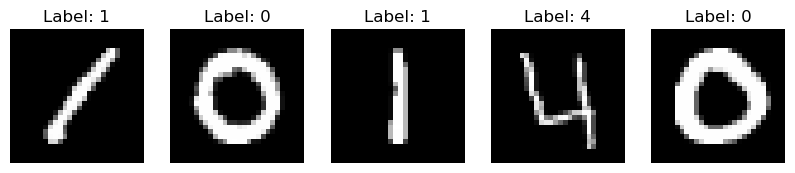

In [7]:
# Visualizing some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 pixels
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

In [8]:
pip install protobuf==3.20.*

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 8️⃣ Normalize Pixel Values and Reshape Images for CNN
We normalize the pixel values in the train dataset by scaling them from a range of 0-255 to 0-1 to improve model performance and training stability.
and, We reshape the images in the train dataset to a 4D array (28x28 pixels, 1 channel for grayscale) to be compatible with Convolutional Neural Networks (CNN).

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize pixel values (scale from 0-255 to 0-1)
X_train = X_train / 255.0

# Reshape images for CNN (28x28 pixels, 1 channel for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the final datasets
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, Labels Shape: {y_val.shape}")

Training Data Shape: (33600, 28, 28, 1), Labels Shape: (33600, 10)
Validation Data Shape: (8400, 28, 28, 1), Labels Shape: (8400, 10)


### 9️⃣ Define the CNN Model
We define a Convolutional Neural Network (CNN) model with multiple convolutional layers, pooling layers, and fully connected layers for digit classification.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Layer
    Dense(units=128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting

    # Output Layer (10 classes for digits 0-9)
    Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 🔟Train the Model
We train the CNN model using the training data, validation data, and defined hyperparameters, applying the callbacks to monitor and adjust the training process.

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define hyperparameters
batch_size = 64  # Number of samples per training batch
epochs = 20  # Number of full passes through the dataset

# Early Stopping (stop training if validation loss doesn't improve for 3 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce Learning Rate (reduce LR by 0.5 if validation loss doesn't improve for 2 epochs)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7791 - loss: 0.6992 - val_accuracy: 0.9720 - val_loss: 0.0900 - learning_rate: 0.0010
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9653 - loss: 0.1154 - val_accuracy: 0.9812 - val_loss: 0.0577 - learning_rate: 0.0010
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9756 - loss: 0.0847 - val_accuracy: 0.9867 - val_loss: 0.0415 - learning_rate: 0.0010
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9824 - loss: 0.0586 - val_accuracy: 0.9875 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9850 - loss: 0.0489 - val_accuracy: 0.9893 - val_loss: 0.0311 - learning_rate: 0.0010
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9882 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9885 - loss: 0.0385 - 

### 1️⃣1️⃣ Plot Training History and Confusion Matrix
We visualize the training history of the model by plotting both accuracy and loss over each epoch for the training and validation sets.
and We compute and plot the confusion matrix to evaluate the model's classification performance, showing how well it predicts each class.

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0277

Validation Accuracy: 0.9920
Validation Loss: 0.0261


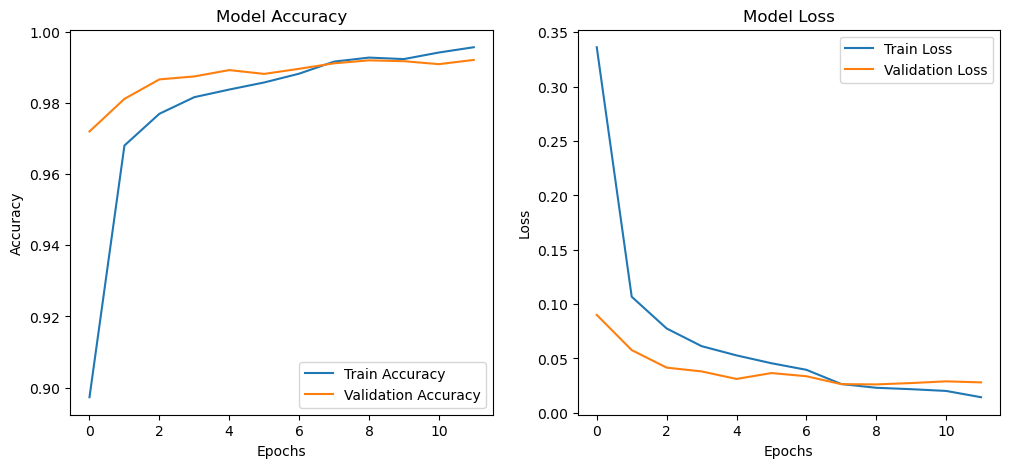

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


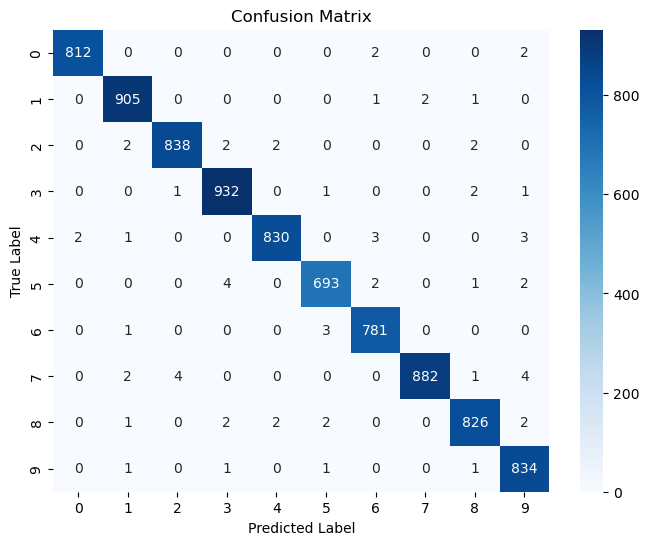

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Plot training history (Accuracy & Loss)
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Plot Loss
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call the function to plot
plot_training_history(history)

# Generate predictions for validation set
y_pred = model.predict(X_val)

# Convert one-hot encoded labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 1️⃣2️⃣ Load the Test Dataset and Make Predictions on the Test Dataset
We load the test dataset to make predictions after the model is trained.
And We use the trained model to make predictions on the test dataset and convert the predicted probabilities into class labels (0-9).

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


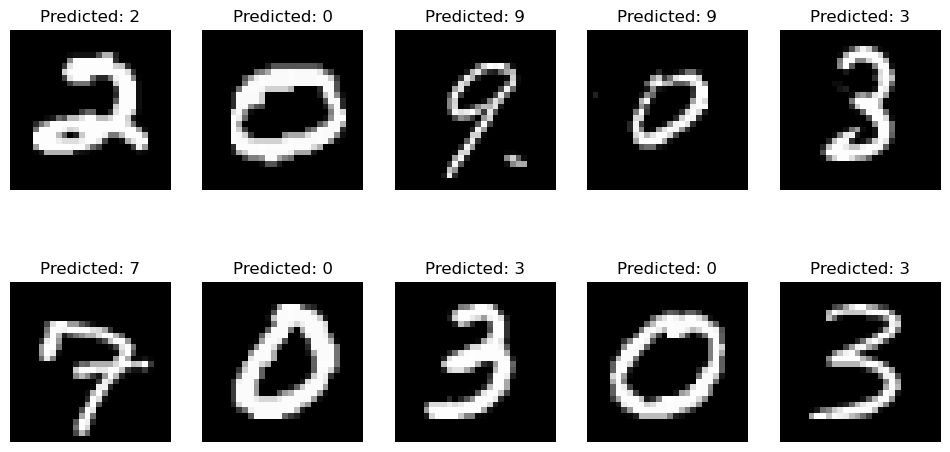

In [13]:
# Load the test dataset
test_df = pd.read_csv("test.csv")

# Convert test data to NumPy array
X_test = test_df.values

# Normalize the test data (scale pixel values from 0-255 to 0-1)
X_test = X_test / 255.0

# Reshape test images for CNN input
X_test = X_test.reshape(-1, 28, 28, 1)

# Make predictions on the test dataset
y_test_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (0-9)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Display some sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {y_test_pred_classes[i]}")
    axes[i].axis('off')

plt.show()